Parth Kalkar p.kalkar@innopolis.university

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 

# Task 1

In [ ]:
df = pd.read_csv('/content/task1_dataset_full.csv')
df1 = pd.read_csv('task1_dataset.csv')

In [ ]:
df1.isnull().sum()

Unnamed: 0      0
0               0
1             583
2             583
3             583
dtype: int64

In [ ]:
df1

,Unnamed: 0,0,1,2,3
0,0,2017-02-10 07:00:00,25.618887,-0.932839,3.900162
1,1,2017-02-04 20:00:00,28.559832,-1.171867,0.223089
2,2,2017-02-18 16:00:00,31.390287,0.826090,2.069539
3,3,2017-01-15 08:00:00,14.205741,-0.921493,1.207404
4,4,2017-02-09 03:00:00,25.047604,0.294643,4.731710
...,...,...,...,...,...
1995,1995,2017-01-23 10:00:00,20.383428,1.447426,-2.971402
1996,1996,2017-01-17 05:00:00,17.117614,0.252971,0.684403
1997,1997,2017-02-14 17:00:00,NaN,NaN,NaN
1998,1998,2017-02-05 03:00:00,NaN,NaN,NaN


In [ ]:

df['datetime'] = pd.to_datetime(df["datetime"])

In [ ]:
#Renaming Column for better Understanding
df1 = df1.rename(columns={"Unnamed: 0":"id","0":"datetime","1":"feature1","2":"feature2","3":"feature3"})
df = df.rename(columns={"Unnamed: 0":"id"})

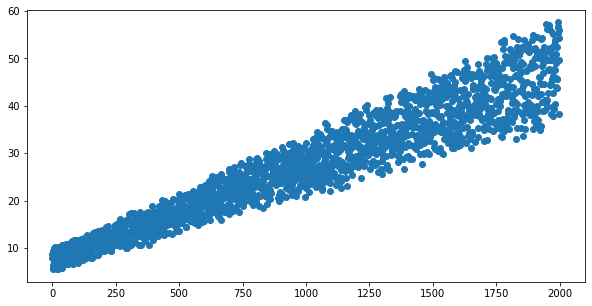

In [ ]:
#Plotting Feature1 of ground truth
plt.figure(figsize=(10,5))
plt.scatter(df['id'], df['feature1'])
plt.show()

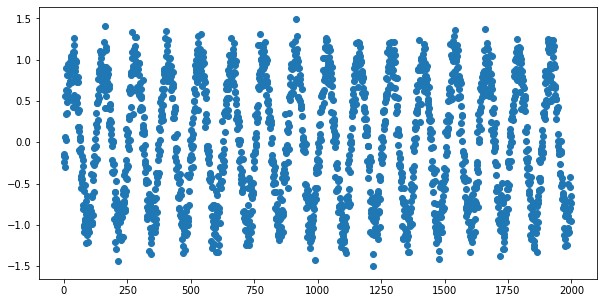

In [ ]:
#Plotting Feature2 of ground truth
plt.figure(figsize=(10,5))
plt.scatter(df['id'], df['feature2'])
plt.show()

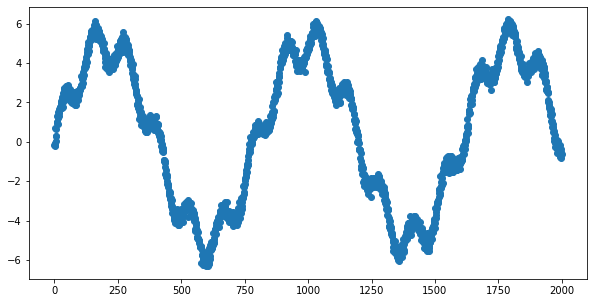

In [ ]:
#Plotting Feature1 of ground truth
plt.figure(figsize=(10,5))
plt.scatter(df['id'], df['feature3'])
plt.show()

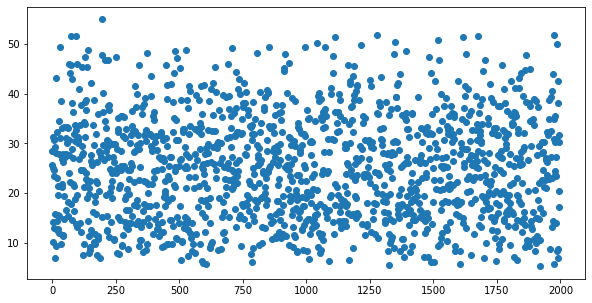

In [ ]:
#Plotting Feature1 of Test Data
plt.figure(figsize=(10,5))
plt.scatter(df1['id'], df1['feature1'])
plt.show()

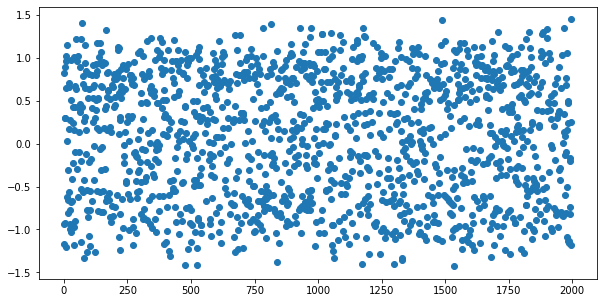

In [ ]:
#Plotting Feature2 of Test Data
plt.figure(figsize=(10,5))
plt.scatter(df1['id'], df1['feature2'])
plt.show()

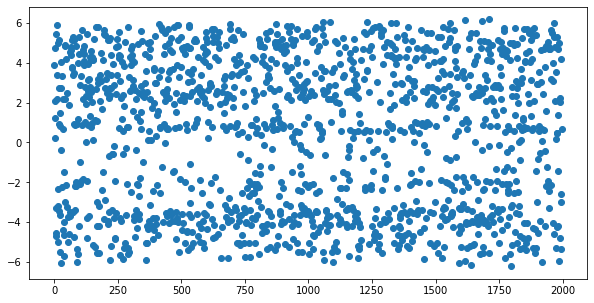

In [ ]:
#Plotting Feature1 of Test Data
plt.figure(figsize=(10,5))
plt.scatter(df1['id'], df1['feature3'])
plt.show()


 Feature1 Prediction

In [ ]:
#Splitting Dataset into 7:3
MSE_Truth_F1 = []
MSE_Test_F1 = []
X = np.array(df['id'])
y = np.array(df['feature1'])
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2915, random_state=42)

In [ ]:
#Implementing polynomial Linear Regression with degree 1on feature1
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

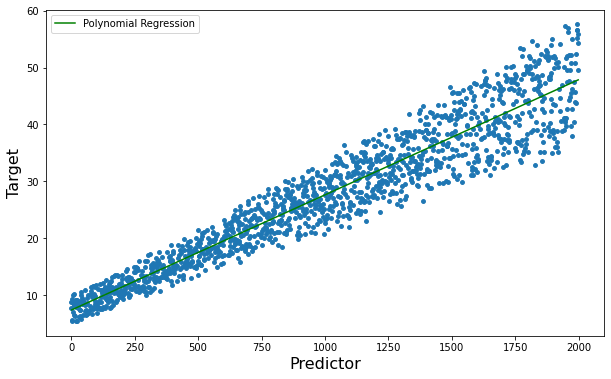

In [ ]:
# Ploting regression line on the truth data with degree 1
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth=np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth)
print('RMSE for Polynomial Regression=>',RMSE_Truth)

RMSE for Polynomial Regression=> 16.91094002709075


In [ ]:
# obtaining null values of feature1 for prediction
df1_feature1 = df1[df1['feature1'].isnull()].copy()

In [ ]:
# redicting null values of feaure1 with 1 degree polynomial linear regression 
feature1_predictor =np.array(df1_feature1['id'])
feature1_predict = np.array(df1_feature1['feature1'])
poly_pred=pipe.predict(feature1_predictor.reshape(-1,1))
RMSE_Test = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test)
print('RMSE for Polynomial Regression=>',RMSE_Test)
df1_feature1_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature1_Predicted

RMSE for Polynomial Regression=> 16.605521699769373


,Predicted
0,7.624071
1,7.988534
2,8.029030
3,8.110021
4,8.332748
...,...
578,47.593454
579,47.633950
580,47.816181
581,47.836429


In [ ]:
## redicting null values of feaure1 with 10 degree polynomial linear regression
Input=[('polynomial',PolynomialFeatures(degree=10)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

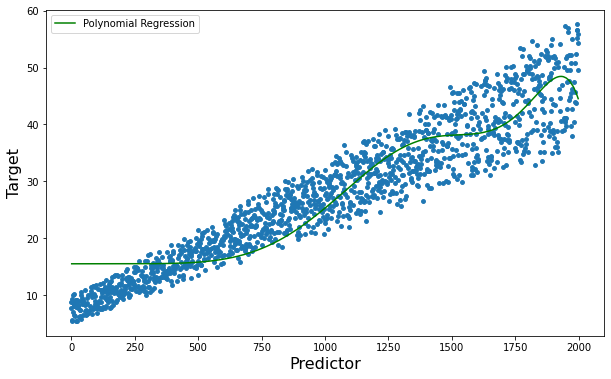

In [ ]:
# Plotting regression line on truth dataset
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth10)
print('RMSE for Polynomial Linear Regression on Ground Truth Data=>',RMSE_Truth10)

RMSE for Polynomial Linear Regression on Ground Truth Data=> 16.680660556015294


In [ ]:
# redicting null values of feaure1 with 10 degree polynomial linear regression
feature1_predictor =np.array(df1_feature1['id'])
feature1_predict = np.array(df1_feature1['feature1'])
poly_pred=pipe.predict(feature1_predictor.reshape(-1,1))
RMSE_Test10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test10)
print('RMSE for Polynomial Linear  Regression on Test Data=>',RMSE_Test10)
df1_feature1_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature1_Predicted

RMSE for Polynomial Linear  Regression on Test Data=> 16.521312117877137


,Predicted
0,15.520418
1,15.520418
2,15.520418
3,15.520418
4,15.520418
...,...
578,45.951576
579,45.742139
580,44.665293
581,44.531412


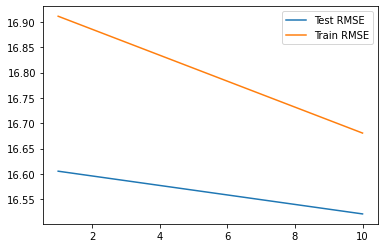

In [ ]:
# Plotting Test and Train RMSE Error to chk best degree
x = [1,10]
plt.plot(x, MSE_Test_F1, label = "Test RMSE")
plt.plot(x, MSE_Truth_F1, label = "Train RMSE")
plt.legend()
plt.show()

Feature 2

In [ ]:
# Splitting data for feature2
MSE_Truth_F1 = []
MSE_Test_F1 = []
X = np.array(df['id'])
y = np.array(df['feature2'])
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2915, random_state=42)

In [ ]:

Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

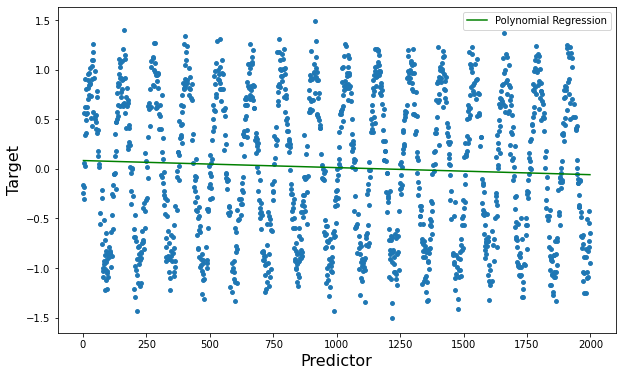

In [ ]:
# Plotting Regression line with 1 degre
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth1 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth1)
print('RMSE for Polynomial Linear Regression on Ground Truth Data=>',RMSE_Truth1)

RMSE for Polynomial Linear Regression on Ground Truth Data=> 0.7480762119946583


In [ ]:
# predicting null values of feaure2 with 1 degree polynomial linear regression
df1_feature2 = df1[df1['feature2'].isnull()].copy()
feature2_predictor =np.array(df1_feature2['id'])
feature2_predict = np.array(df1_feature2['feature2'])
poly_pred=pipe.predict(feature2_predictor.reshape(-1,1))
RMSE_Test1 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test1)
print('RMSE for Polynomial Linear  Regression on Test Data=>',RMSE_Test1)
df1_feature2_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature2_Predicted

RMSE for Polynomial Linear  Regression on Test Data=> 0.747985764285484


,Predicted
0,0.083661
1,0.082377
2,0.082234
3,0.081949
4,0.081164
...,...
578,-0.057159
579,-0.057302
580,-0.057944
581,-0.058015


In [ ]:

Input=[('polynomial',PolynomialFeatures(degree=10)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

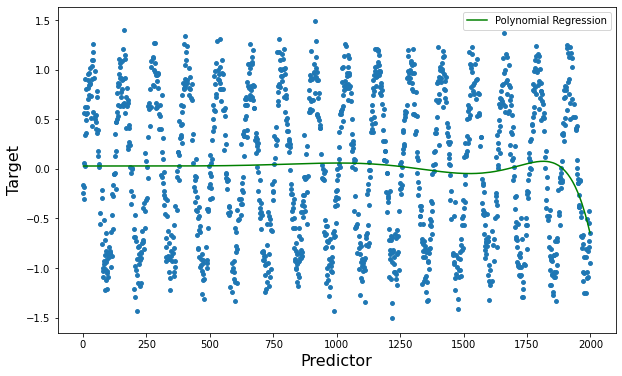

In [ ]:
# Plotting regression line with 10 degree
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth10)
print('RMSE for Polynomial Linear Regression on Ground Truth Data=>',RMSE_Test10)

RMSE for Polynomial Linear Regression on Ground Truth Data=> 16.521312117877137


In [ ]:
# redicting null values of feaure2 with 10 degree polynomial linear regression
df1_feature2 = df1[df1['feature2'].isnull()].copy()
feature2_predictor =np.array(df1_feature2['id'])
feature2_predict = np.array(df1_feature2['feature2'])
poly_pred=pipe.predict(feature2_predictor.reshape(-1,1))
RMSE_Test10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test10)
print('RMSE for Polynomial Linear  Regression on Test Data=>',RMSE_Test10)
df1_feature2_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature2_Predicted

RMSE for Polynomial Linear  Regression on Test Data=> 0.7430033102635512


,Predicted
0,0.029352
1,0.029352
2,0.029352
3,0.029352
4,0.029352
...,...
578,-0.519503
579,-0.539239
580,-0.634075
581,-0.645242


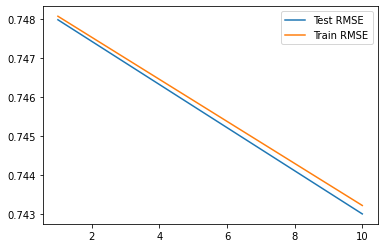

In [ ]:
# Plotting Test and Train RMSE Error to chk best degree
x = [1,10]
plt.plot(x, MSE_Test_F1, label = "Test RMSE")
plt.plot(x, MSE_Truth_F1, label = "Train RMSE")
plt.legend()
plt.show()

Feature 3

In [ ]:
# Feature 3 data splitting
MSE_Test_F1 =[]
MSE_Truth_F1 = []
X = np.array(df['id'])
y = np.array(df['feature3'])
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2915, random_state=42)

In [ ]:

Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

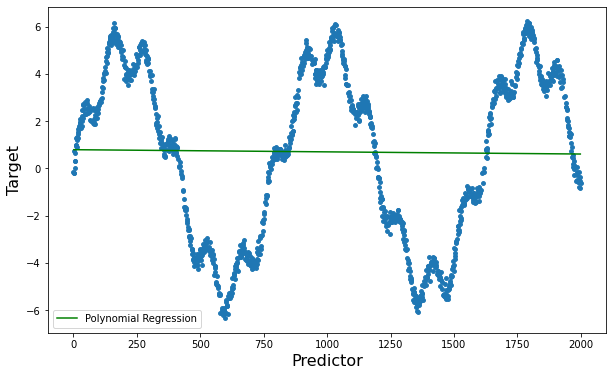

In [ ]:
#plotting regression line with 1 degree on truth data
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth1 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth1)
print('RMSE for Polynomial Linear Regression on Ground Truth Data=>',RMSE_Truth1)

RMSE for Polynomial Linear Regression on Ground Truth Data=> 3.6045933915412642


In [ ]:
# redicting null values of feaure3 with 1 degree polynomial linear regression
df1_feature3 = df1[df1['feature3'].isnull()].copy()
feature3_predictor =np.array(df1_feature3['id'])
feature3_predict = np.array(df1_feature3['feature3'])
poly_pred=pipe.predict(feature3_predictor.reshape(-1,1))
RMSE_Test1 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test1)
print('RMSE for Polynomial Linear  Regression on Test Data=>',RMSE_Test1)
df1_feature3_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature3_Predicted

RMSE for Polynomial Linear  Regression on Test Data=> 3.6046516776336968


,Predicted
0,0.789869
1,0.788216
2,0.788032
3,0.787665
4,0.786655
...,...
578,0.608582
579,0.608399
580,0.607572
581,0.607480


In [ ]:
# With degree 10
Input=[('polynomial',PolynomialFeatures(degree=10)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

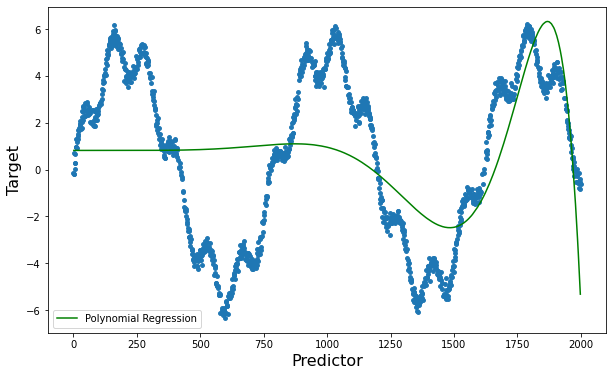

In [ ]:
poly_pred=pipe.predict(X_test.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [ ]:
RMSE_Truth10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Truth_F1.append(RMSE_Truth10)
print('RMSE for Polynomial Linear Regression on Ground Truth Data=>',RMSE_Truth10)

RMSE for Polynomial Linear Regression on Ground Truth Data=> 3.9426438003541686


In [ ]:
# redicting null values of feaure3 with 10 degree polynomial linear regression
feature3_predictor =np.array(df1_feature2['id'])
feature3_predict = np.array(df1_feature3['feature3'])
poly_pred=pipe.predict(feature3_predictor.reshape(-1,1))
RMSE_Test10 = np.sqrt(mean_squared_error(y_test,poly_pred))
MSE_Test_F1.append(RMSE_Test10)
print('RMSE for Polynomial Linear  Regression on Test Data=>',RMSE_Test10)
df1_feature3_Predicted = pd.DataFrame(poly_pred, 
             columns=['Predicted'])
df1_feature3_Predicted

RMSE for Polynomial Linear  Regression on Test Data=> 3.9417393694297824


,Predicted
0,0.819308
1,0.819308
2,0.819308
3,0.819308
4,0.819308
...,...
578,-2.775938
579,-3.170286
580,-5.089284
581,-5.317619


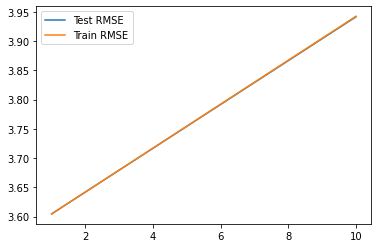

In [ ]:
# Plotting Test and Train RMSE Error to chk best degree
x = [1,10]
plt.plot(x, MSE_Test_F1, label = "Test RMSE")
plt.plot(x, MSE_Truth_F1, label = "Train RMSE")
plt.legend()
plt.show()

After predicting null values using different degree in polynomial linear regression model we come to know that the best performing model for feature 1 and feature 2 is 10 degree polynomial linear regresion model while in the feature3 the best performing model gives same result in both degree 1 and 10  polynimial regression model.

# Task2

In [ ]:
df = pd.read_csv('/content/GermanData.csv')
df.isnull().sum()

A11     0
6       0
A34     0
A43     0
1169    0
A65     0
A75     0
4       0
A93     0
A101    0
4.1     0
A121    0
67      0
A143    0
A152    0
2       0
A173    0
1       0
A192    0
A201    0
1.1     0
dtype: int64

In [ ]:
# Renaming Column Name According to dataset description
df = df.rename(columns={"A11":"Status","6":"Duration","A34":"Credit History","A43":"Purpose","1169":"Credit Amount","A65":"Savings account/bonds",
                        "A75":"Present employment since","4":"Installment rate","A93":"Gender/Marital Status","A101":"Debtors/guarantors","4.1":"Residence since","A121":"Property","67":"Age","A143":"Installment plans","A152":"Housing","2":"Existing credits","A173":"Job","1":"liable For maintenance","A192":"Telepone","A201":"Foreign Worker","1.1":"Class"})

In [ ]:
# Encoding Categorical Features
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])
df['Credit History'] = label_encoder.fit_transform(df['Credit History'])
df['Purpose'] = label_encoder.fit_transform(df['Purpose'])
df['Credit Amount'] = label_encoder.fit_transform(df['Credit Amount'])
df['Savings account/bonds'] = label_encoder.fit_transform(df['Savings account/bonds'])
df['Present employment since'] = label_encoder.fit_transform(df['Present employment since'])
df['Gender/Marital Status'] = label_encoder.fit_transform(df['Gender/Marital Status'])
df['Debtors/guarantors'] = label_encoder.fit_transform(df['Debtors/guarantors'])
df['Property'] = label_encoder.fit_transform(df['Property'])
df['Installment plans'] = label_encoder.fit_transform(df['Installment plans'])
df['Housing'] = label_encoder.fit_transform(df['Housing'])
df['Job'] = label_encoder.fit_transform(df['Job'])
df['Telepone'] = label_encoder.fit_transform(df['Telepone'])
df['Foreign Worker'] = label_encoder.fit_transform(df['Foreign Worker'])

In [ ]:
# Getting numerical features for the PCA plotting
features = ['Duration','Age', 'Installment rate', 'Residence since', 'Existing credits','liable For maintenance',]
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Class']].values
X = StandardScaler().fit_transform(X)

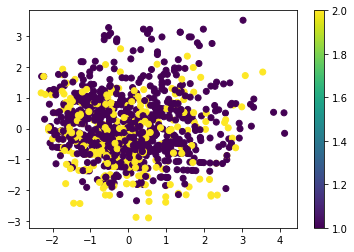

In [ ]:
# Converting into pricipal components and plotting them
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y) 
plt.colorbar() 

In [ ]:
# Corelation Metrics for checking corelation
df_corr = df.corr()
df_corr

,Status,Duration,Credit History,Purpose,Credit Amount,Savings account/bonds,Present employment since,Installment rate,Gender/Marital Status,Debtors/guarantors,Residence since,Property,Age,Installment plans,Housing,Existing credits,Job,liable For maintenance,Telepone,Foreign Worker,Class
Status,1.000000,-0.073680,0.194207,0.053598,-0.026312,0.225727,0.108201,-0.004131,0.043865,-0.128225,-0.040974,-0.033940,0.063519,0.047463,0.022609,0.077397,0.040880,-0.014696,0.067925,-0.027026,-0.352022
Duration,-0.073680,1.000000,-0.075649,0.096431,0.632245,0.050052,0.059135,0.075976,0.015359,-0.024886,0.035410,0.302855,-0.032863,-0.054361,0.157336,-0.010025,0.211256,-0.024385,0.166472,-0.138548,0.214326
Credit History,0.194207,-0.075649,1.000000,-0.082066,-0.032176,0.036686,0.136671,0.043196,0.041608,-0.040305,0.061879,-0.052127,0.144046,0.121476,0.061972,0.436309,0.010162,0.012138,0.050820,0.014150,-0.228159
Purpose,0.053598,0.096431,-0.082066,1.000000,-0.020711,-0.024599,0.024659,0.078017,-0.003171,-0.032177,-0.063241,-0.030710,-0.031507,-0.039474,-0.019525,0.034706,-0.032695,-0.056344,0.018370,-0.124272,0.001688
Credit Amount,-0.026312,0.632245,-0.032176,-0.020711,1.000000,0.062767,-0.005550,-0.307037,-0.025479,-0.026924,0.025888,0.311332,0.008367,-0.027952,0.100722,0.019662,0.292538,0.041285,0.257274,-0.082741,0.090166
Savings account/bonds,0.225727,0.050052,0.036686,-0.024599,0.062767,1.000000,0.118800,0.020350,0.016554,-0.104692,0.089703,0.021376,0.079608,0.001064,0.006270,-0.023581,0.011459,0.028350,0.085186,0.007467,-0.178079
Present employment since,0.108201,0.059135,0.136671,0.024659,-0.005550,0.118800,1.000000,0.125096,0.110787,-0.007717,0.244031,0.089075,0.253722,-0.040812,0.111048,0.124592,0.101120,0.097862,0.058988,-0.026994,-0.115253
Installment rate,-0.004131,0.075976,0.043196,0.078017,-0.307037,0.020350,0.125096,1.000000,0.118957,-0.011124,0.048387,0.054650,0.055961,-0.001407,0.089320,0.020744,0.097663,-0.070850,0.013312,-0.089884,0.073052
Gender/Marital Status,0.043865,0.015359,0.041608,-0.003171,-0.025479,0.016554,0.110787,0.118957,1.000000,0.050778,-0.027758,-0.006365,0.006565,-0.036979,0.099530,0.064250,-0.012024,0.122381,0.026751,0.065714,-0.087918
Debtors/guarantors,-0.128225,-0.024886,-0.040305,-0.032177,-0.026924,-0.104692,-0.007717,-0.011124,0.050778,1.000000,-0.025374,-0.155981,-0.029145,-0.058892,-0.065852,-0.025149,-0.057922,0.020272,-0.074724,0.117948,-0.025342


In [ ]:
# Splitting data into 7:3
X = df.drop('Class', axis =1)
y = df['Class']
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3, random_state=40)

In [ ]:
#Implementing Logistic regression with linear function
Lr = LogisticRegression()
Lr = Lr.fit(X_train,y_train)
Lr_pred = Lr.predict(X_test)
print('RMSE for Polynomial Regression=>',mean_squared_error(y_test,Lr_pred))

RMSE for Polynomial Regression=> 0.2875536480686695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Implementing Logistic regression with non linear function
lr = LogisticRegression(max_iter=10000, verbose=0, tol=1.0e-8, solver='lbfgs' )
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('MSE for Logistic Regression Non Linear Regression=>',mean_squared_error(y_test,lr_pred))

MSE for Logistic Regression Non Linear Regression=> 0.2732474964234621


In [ ]:
# Polynomial Regression at different degrees
train_score = []
test_score = []
d_vals = []
for d in range(1,8):
  Input=[('polynomial',PolynomialFeatures(degree=d)),('modal',LogisticRegression())]
  d_vals.append(d)
  pipe=Pipeline(Input)
  pipe.fit(X_train,y_train)
  tr_score = pipe.score(X_train, y_train)
  train_score.append(tr_score)
    
  te_score = pipe.score(X_test, y_test)
  test_score.append(te_score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


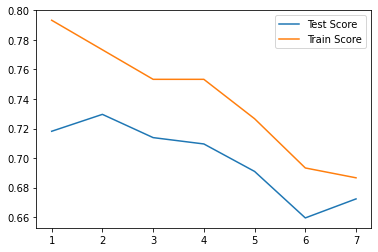

In [ ]:
# Plotting Test and Train Error to chk best degree
x = [1,2,3,4,5,6,7]
plt.plot(x, test_score, label = "Test Score")
plt.plot(x, train_score, label = "Train Score")
plt.legend()
plt.show()

In [ ]:
Male_MSE = []
Female_MSE = []

In [ ]:
# Best Degree with penalty l1 and solver Liblinear
Input=[('polynomial',PolynomialFeatures(degree=6)),('modal',LogisticRegression(penalty='l1',solver='liblinear'))]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)
pipe_pred = pipe.predict(X_test)


In [ ]:
# Best Degree with penalty l2 and solver lbfgs 
Input=[('polynomial',PolynomialFeatures(degree=6)),('modal',LogisticRegression(penalty='l2',solver='lbfgs'))]
pipe2=Pipeline(Input)
pipe2.fit(X_train,y_train)
pipe_pred = pipe2.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
MSE = mean_squared_error(y_test,pipe_pred)
Male_MSE.append(MSE)
Female_MSE.append(MSE)
MSE

0.3547925608011445

In [ ]:
# Getting best params using GridsearchCV
param_grid={}
Grid_SCV = GridSearchCV(pipe,param_grid=param_grid)
Grid_SCV.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial',
                                        PolynomialFeatures(degree=6,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('modal',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_

In [ ]:
Grid_SCV.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial',
                                        PolynomialFeatures(degree=6,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('modal',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                     

In [ ]:
param_grid={}
Grid_SCV = GridSearchCV(pipe2,param_grid=param_grid)
Grid_SCV.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial',
                                        PolynomialFeatures(degree=6,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('modal',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_

In [ ]:
Grid_SCV.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial',
                                        PolynomialFeatures(degree=6,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('modal',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                     

In [ ]:
#slitting Test data according to male female
X_test_Male = X_test[(X_test["Gender/Marital Status"]==0) | (X_test["Gender/Marital Status"]==42) | (X_test["Gender/Marital Status"]==4)]
X_test_Female =  X_test[(X_test["Gender/Marital Status"]==1) | (X_test["Gender/Marital Status"]==3)]

In [ ]:
# MSE error For male and female
X_test_Male_pred =pipe.predict(X_test_Male)
X_test_Female_pred = pipe.predict(X_test_Female)
y_test_F = y_train.iloc[23:]
y_test_M = y_train.iloc[:35]
Male_Test_MSE = mean_squared_error(y_test_M,X_test_Male_pred)
Female_Test_MSE = mean_squared_error(y_test_F,X_test_Female_pred)
Male_MSE.append(Male_Test_MSE)
Female_MSE.append(Female_Test_MSE)
print('MSE for Male Linear Regression=>',Male_Test_MSE)
print('MSE for Female Linear Regression=>',Female_Test_MSE)

MSE for Male Linear Regression=> 0.5714285714285714
MSE for Female Linear Regression=> 0.4584837545126354


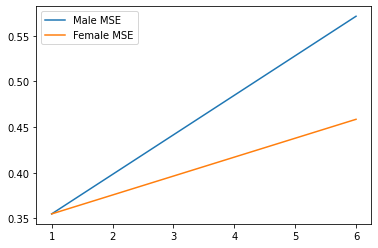

In [ ]:
# Plotting Test and Train Error to chk best degree
x = [1,6]
plt.plot(x, Male_MSE, label = "Male MSE ")
plt.plot(x, Female_MSE, label = "Female MSE")
plt.legend()
plt.show()

After performing logistic regression on the different polynomial degree we found that the at degree 6 model performs best then other. We were able to get the performance of the model till 8 degree. while at 9 and 10 degree there is an error of ram crashed and reuntime  starts again. After getting the best degree we divide the test data according to male and female and then we perform prediction on the data from whcih we found that the model perfoms better on the female data.